In [124]:
import pandas as pd
import numpy as np

In [412]:
miss_mechanism = ['MCAR','MAR','MNAR']
methods = ["Mean/Mode", "MICE", "MissForest", "GAIN", "DSAN", "DSN", "MIDAS"]
miss_ratio = [10,30,50]
test_number = 10

In [372]:
case = 11
con_methods = {}
cat_methods = {}

for method in methods:
    mech_con_dict = {}
    mech_cat_dict = {}
    for mechanism in miss_mechanism:
        con_mean = []
        con_std = []
        cat_mean = []
        cat_std = []
        for ratio in miss_ratio:
            performance_file_path = f"performance/{mechanism}/Case{case}/miss{ratio}/{method}_summary.csv"
            performance_file = pd.read_csv(performance_file_path)

            con_mean.append(round(performance_file['meanCon'][0],3))
            con_std.append(round(performance_file['varCon'][0],3))
            cat_mean.append(round(performance_file['meanCat'][0],3))
            cat_std.append(round(performance_file['varCat'][0],3))
        mech_con_dict[mechanism] = con_mean
        mech_con_dict[mechanism+'_error'] = con_std
        mech_cat_dict[mechanism] = cat_mean
        mech_cat_dict[mechanism+'_error'] = cat_std
    con_methods[method] = mech_con_dict
    if method == 'Mean':
        cat_methods['Mode'] = mech_cat_dict
    else:
        cat_methods[method] = mech_cat_dict

In [413]:
import numpy as np
import matplotlib.pyplot as plt

# Example data for plotting
missing_ratios = [0.1, 0.3, 0.5]
methods_colors = {
    'Mode': 'black',
    'Mean': 'black',
    'Mean/Mode': 'black',
    'MICE': '#d62728',
    'GAIN': 'orange',
    'DSAN': 'darkseagreen',
    'DSN': 'violet',
    'MIDAS': 'lightskyblue',
    'MissForest': 'mediumpurple'
}


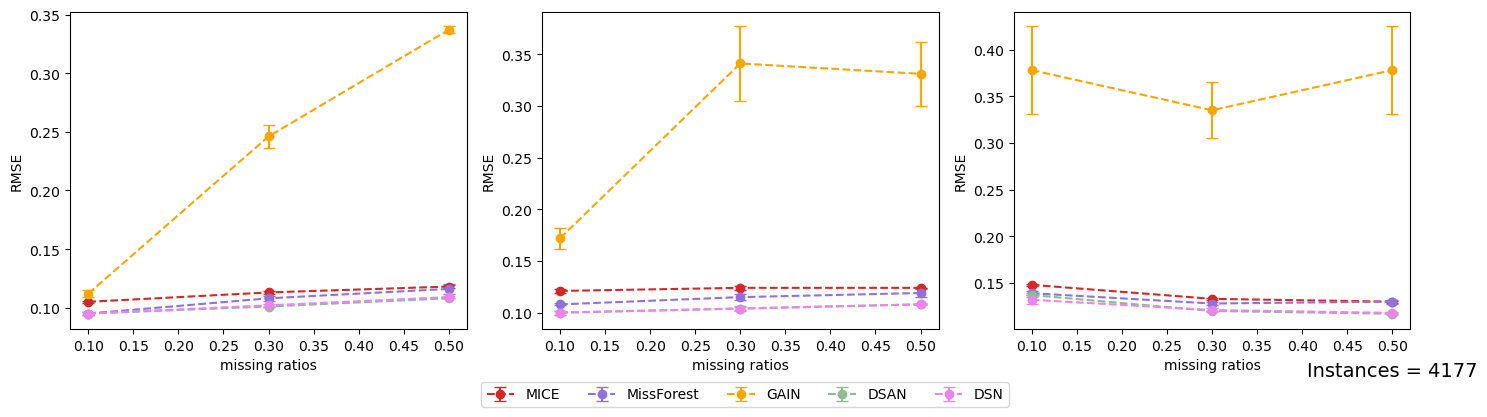

In [281]:
# Create subplots for MCAR, MAR, MNAR
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
mechanisms = ['MCAR', 'MAR', 'MNAR']

for idx, mech in enumerate(mechanisms):
    ax = axes[idx]
    for method, data in con_methods.items():
        if method != 'Mean':
            ax.errorbar(missing_ratios, data[mech], yerr=data[mech+'_error'], fmt='o--', label=method, color=methods_colors[method],capsize=4)
        else:
            ax.errorbar(missing_ratios, data[mech], yerr=data[mech+'_error'], fmt='-.', label=method, color=methods_colors[method])
    
#     ax.set_title(mech)
    ax.set_xlabel('missing ratios')
    ax.set_ylabel('RMSE')
    
# Collect handles and labels from all subplots
handles, labels = [], []
for h, l in zip(*axes[0].get_legend_handles_labels()):
    handles.append(h)
    labels.append(l)

# Add a single legend for the whole figure
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=5)


# Show the plot
plt.tight_layout()
plt.show()

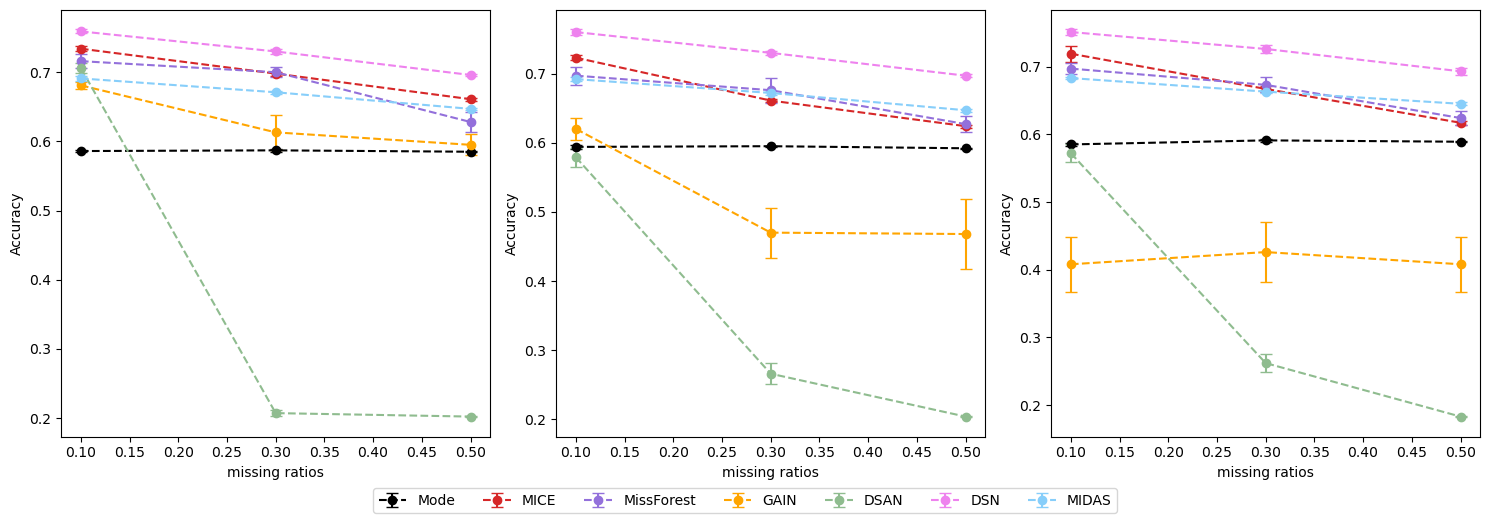

In [260]:
# Create subplots for MCAR, MAR, MNAR
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
mechanisms = ['MCAR', 'MAR', 'MNAR']

for idx, mech in enumerate(mechanisms):
    ax = axes[idx]
    for method, data in cat_methods.items():
        if method != 'Mean':
            ax.errorbar(missing_ratios, data[mech], yerr=data[mech+'_error'], fmt='o--', label=method, color=methods_colors[method],capsize=4)
        else:
            ax.errorbar(missing_ratios, data[mech], yerr=data[mech+'_error'], fmt='o-.', label=method, color=methods_colors[method],capsize=4)
    
#     ax.set_title(mech)
    ax.set_xlabel('missing ratios')
    ax.set_ylabel('Accuracy')
    
# Collect handles and labels from all subplots
handles, labels = [], []
for h, l in zip(*axes[0].get_legend_handles_labels()):
    handles.append(h)
    labels.append(l)

# Add a single legend for the whole figure
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=7)


# Show the plot
plt.tight_layout()
plt.show()

In [414]:
downstream = pd.read_csv('downstream_performance.csv',  encoding='unicode_escape', header = None, names = methods)

In [427]:
dataset = 12
perform = downstream.iloc[(dataset-11)*9:(dataset-10)*9,:]

In [428]:
mean_value = perform.applymap(lambda x: float(x.split("±")[0][:-1]))
std_value = perform.applymap(lambda x: float(x.split("±")[1][:-1]))

In [429]:
result = {}
for m in methods:
    app_res = {}
    app_res["MCAR"] = list(mean_value[m][:3])
    app_res["MAR"] = list(mean_value[m][3:6])
    app_res["MNAR"] = list(mean_value[m][6:9])
    app_res["MCAR_error"] = list(std_value[m][:3])
    app_res["MAR_error"] = list(std_value[m][3:6])
    app_res["MNAR_error"] = list(std_value[m][6:9])
    result[m] = app_res

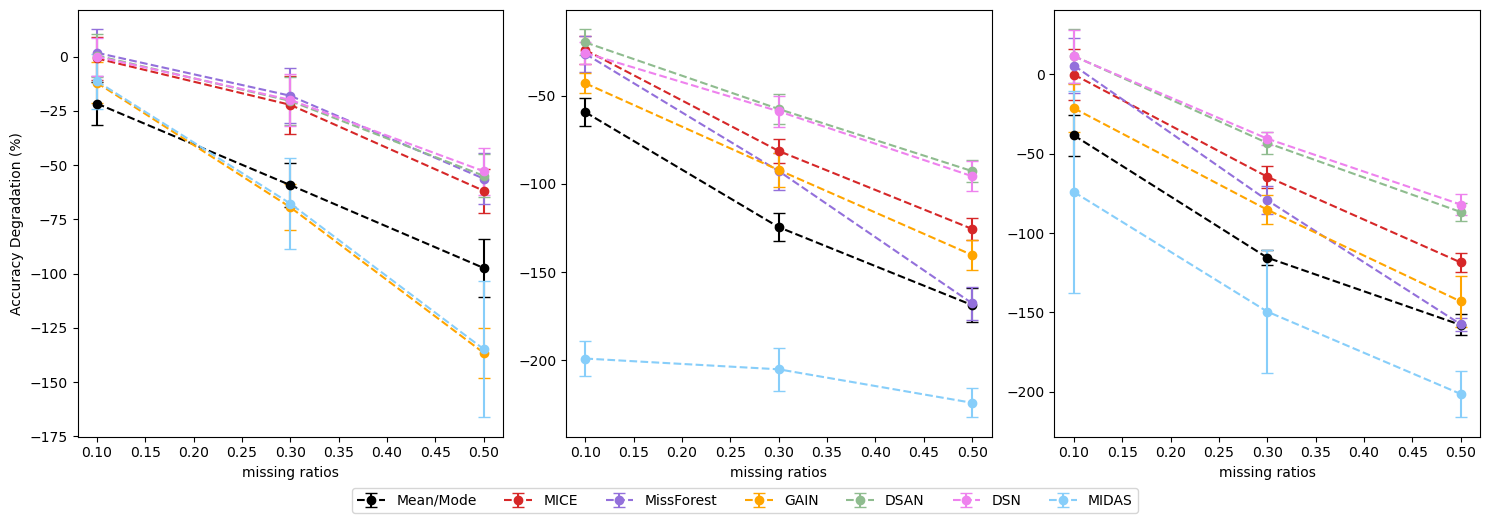

In [430]:
# Create subplots for MCAR, MAR, MNAR
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
mechanisms = ['MCAR', 'MAR', 'MNAR']

for idx, mech in enumerate(mechanisms):
    ax = axes[idx]
    for method, data in result.items():
        if method != 'Mean':
            ax.errorbar(missing_ratios, data[mech], yerr=data[mech+'_error'], fmt='o--', label=method, color=methods_colors[method],capsize=4)
        else:
            ax.errorbar(missing_ratios, data[mech], yerr=data[mech+'_error'], fmt='o-.', label=method, color=methods_colors[method],capsize=4)
    
#     ax.set_title(mech)
    ax.set_xlabel('missing ratios')
    if idx ==0:
        ax.set_ylabel('Accuracy Degradation (%)')
    
# Collect handles and labels from all subplots
handles, labels = [], []
for h, l in zip(*axes[0].get_legend_handles_labels()):
    handles.append(h)
    labels.append(l)

# Add a single legend for the whole figure
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=7)


# Show the plot
plt.tight_layout()
plt.show()

In [301]:
cat_methods

{'MICE': {'MCAR': [0.734, 0.698, 0.661],
  'MCAR_error': [0.004, 0.003, 0.002],
  'MAR': [0.723, 0.661, 0.624],
  'MAR_error': [0.004, 0.002, 0.002],
  'MNAR': [0.719, 0.667, 0.617],
  'MNAR_error': [0.012, 0.004, 0.003]},
 'MissForest': {'MCAR': [0.716, 0.7, 0.628],
  'MCAR_error': [0.01, 0.007, 0.014],
  'MAR': [0.697, 0.676, 0.627],
  'MAR_error': [0.013, 0.018, 0.012],
  'MNAR': [0.697, 0.673, 0.624],
  'MNAR_error': [0.008, 0.011, 0.01]},
 'GAIN': {'MCAR': [0.681, 0.613, 0.595],
  'MCAR_error': [0.005, 0.025, 0.015],
  'MAR': [0.62, 0.47, 0.468],
  'MAR_error': [0.016, 0.036, 0.05],
  'MNAR': [0.408, 0.426, 0.408],
  'MNAR_error': [0.041, 0.044, 0.041]},
 'DSAN': {'MCAR': [0.706, 0.207, 0.202],
  'MCAR_error': [0.007, 0.004, 0.001],
  'MAR': [0.579, 0.266, 0.204],
  'MAR_error': [0.014, 0.015, 0.001],
  'MNAR': [0.572, 0.262, 0.183],
  'MNAR_error': [0.013, 0.013, 0.001]},
 'DSN': {'MCAR': [0.759, 0.73, 0.696],
  'MCAR_error': [0.003, 0.003, 0.002],
  'MAR': [0.76, 0.73, 0.697],
 